In [2]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler, EulerDiscreteScheduler 
import torch
from utils.sdv14 import call_sdv14
StableDiffusionPipeline.__call__ = call_sdv14
StableDiffusionPipeline._callback_tensor_inputs = ["dt_latents", "latents", "prompt_embeds", "negative_prompt_embeds"]

pipeline = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", 
                                                   safety_checker=None,
                                                   torch_dtype=torch.bfloat16).to(torch.bfloat16).to('cuda')

pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config)

/share/u/rohit/.conda/envs/visdiff/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/share/u/rohit/.conda/envs/visdiff/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [3]:
x0s = {}
def decode_tensors(pipe, step, timestep, callback_kwargs):
    dt_latents = callback_kwargs["dt_latents"]
    x0s['original'] = x0s.get('original', []) + [dt_latents]
    
    return callback_kwargs

  0%|          | 0/50 [00:00<?, ?it/s]

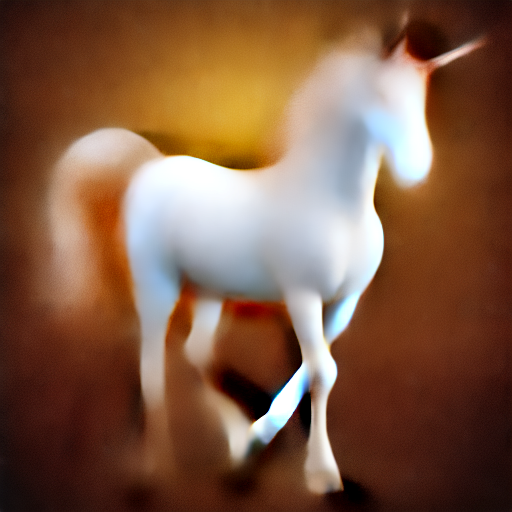

In [5]:
num_inference_steps = 50

visualize_dt_timestep = 10

def interrupt_callback(pipeline, i, t, callback_kwargs):
    if i == visualize_dt_timestep:
        pipeline._interrupt = True

    return callback_kwargs

pipeline(
    "unicorn",
    generator=torch.manual_seed(42),
    num_inference_steps=num_inference_steps,
    callback_on_step_end=interrupt_callback,
).images[0]


